<a href="https://www.kaggle.com/code/vidhikishorwaghela/loan-approval-prediction-v1?scriptVersionId=202646486" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚀 Predicting Loan Status Using Logistic Regression

In this project, we aim to predict whether a loan applicant will default on their loan using a dataset containing various features of applicants. We leverage **Logistic Regression**, a popular classification algorithm, to achieve this.

## 📊 Dataset Overview

We used the following datasets:

- **Training Data**: Contains applicant information and their loan status.
- **Test Data**: Contains applicant information for which we need to predict the loan status.

### Key Features:

- **Age**: Age of the applicant
- **Income**: Annual income of the applicant
- **Home Ownership**: Whether the applicant rents or owns their home
- **Employment Length**: Duration of employment
- **Loan Intent**: Purpose of the loan
- **Loan Amount**: Amount of the loan requested
- **Loan Interest Rate**: Interest rate on the loan
- **Credit History Length**: Length of the applicant's credit history

## 🔍 Data Preprocessing

We performed several preprocessing steps:

1. **Handling Missing Values**: The dataset was checked for missing values, and none were found.
2. **Feature Encoding**: Categorical features were transformed using **One-Hot Encoding** to convert them into a numerical format.
3. **Feature Scaling**: Numerical features were standardized using **StandardScaler** to ensure they are on a similar scale.

## 🔧 Model Training

We split the training data into **training** and **validation** sets (80-20 split). The model used was **Logistic Regression** with an increased `max_iter` to ensure convergence.

### Performance Metrics:

- **Validation ROC AUC**: 🟢 **0.9048**
- **Validation Accuracy**: ✅ **0.9123**

## 📈 Confusion Matrix

The confusion matrix shows the breakdown of our model's predictions:

- True Positives (TP): Predicted default and actual default
- True Negatives (TN): Predicted no default and actual no default
- False Positives (FP): Predicted default but actual no default
- False Negatives (FN): Predicted no default but actual default

![Confusion Matrix](your_confusion_matrix_image_url_here)

### Confusion Matrix Results:
- Precision for default (1): **0.77**
- Recall for default (1): **0.53**
- F1-Score for default (1): **0.63**

## 📊 Classification Report

The classification report provides a detailed overview of model performance:

| Metric       | 0 (No Default) | 1 (Default) |
|--------------|----------------|-------------|
| Precision    | **0.93**       | **0.77**    |
| Recall       | **0.98**       | **0.53**    |
| F1-Score     | **0.95**       | **0.63**    |
| Support      | **10087**      | **1642**    |

Overall accuracy: **91.2%** 🎉

## 🔮 Predictions on the Test Set

Using our trained model, we generated predictions for the test set. The results are stored in a CSV file for submission.

### Conclusion

This project demonstrates the effectiveness of Logistic Regression in predicting loan defaults. The model achieves a high ROC AUC and accuracy, making it suitable for real-world applications in financial institutions. 


In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [2]:
#Loading the datasets:

train_df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

In [3]:
# Display the first few rows of the training dataset
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
test_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [5]:
train_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [6]:
test_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,39098.000000,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,78193.500000,27.566781,6.406046e+04,4.687068,9251.466188,10.661216,0.159573,5.830707
std,11286.764749,6.032761,3.795583e+04,3.868395,5576.254680,3.020220,0.091633,4.072157
min,58645.000000,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
25%,68419.250000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,78193.500000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,87967.750000,30.000000,7.588500e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,97742.000000,94.000000,1.900000e+06,42.000000,35000.000000,22.110000,0.730000,30.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:
train_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [9]:
#Identify numerical and categorical columns:
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

In [10]:
#Dropping the target column from the numerical features list:
numerical_features.remove('loan_status')

In [11]:
#Define a column transformer for preprocessing:
preprocessor = ColumnTransformer(
transformers = [
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

In [12]:
#Split the traiining data into features and target
X = train_df.drop(columns='loan_status')
y = train_df['loan_status']

In [13]:
#Spliting into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create a logistic regression model with increased max_iter
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))


In [15]:
#Fit the model on the training data:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['id', 'person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat', OneHotEncoder(),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [16]:
# Validate the model on the validation set
y_val_pred = model.predict_proba(X_val)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_val, y_val_pred)
print(f'Validation ROC AUC: {roc_auc:.4f}')

Validation ROC AUC: 0.9048


In [17]:
# Make predictions on the test set using the model pipeline
test_predictions = model.predict_proba(test_df)[:, 1]  # Get probabilities for the positive class

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'loan_status': test_predictions
})

# Save to CSV for submission (if required)
submission_df.to_csv('submission.csv', index=False)

print("Predictions on the test set completed and saved to 'submission.csv'.")


Predictions on the test set completed and saved to 'submission.csv'.


In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, model.predict(X_val))
print(f'Validation Accuracy: {accuracy:.4f}')


Validation Accuracy: 0.9123


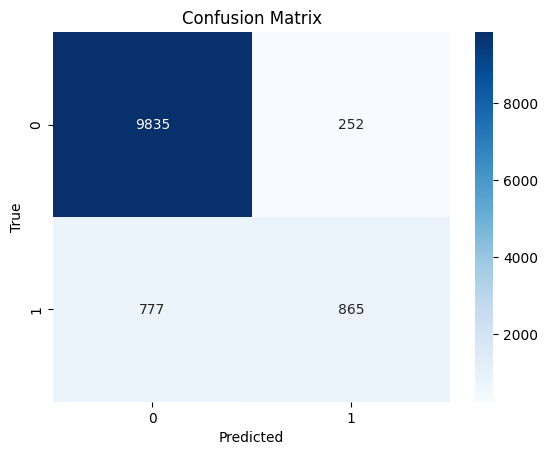

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, model.predict(X_val))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [20]:
from sklearn.metrics import classification_report

report = classification_report(y_val, model.predict(X_val))
print(report)


              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10087
           1       0.77      0.53      0.63      1642

    accuracy                           0.91     11729
   macro avg       0.85      0.75      0.79     11729
weighted avg       0.91      0.91      0.91     11729



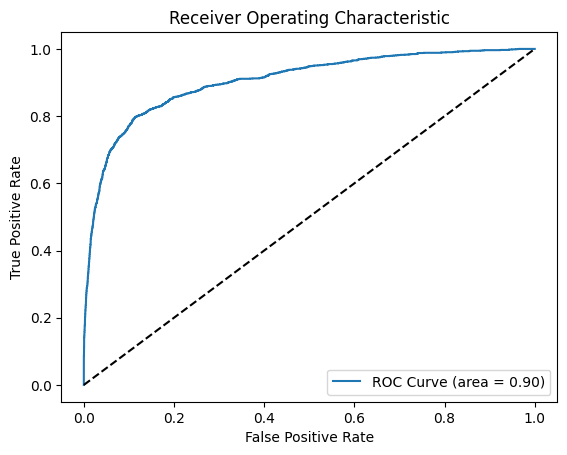

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


{'columntransformer': ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['id', 'person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat', OneHotEncoder(),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])]), 'logisticregression': LogisticRegression(max_iter=500)}
{'num': StandardScaler(), 'cat': OneHotEncoder()}


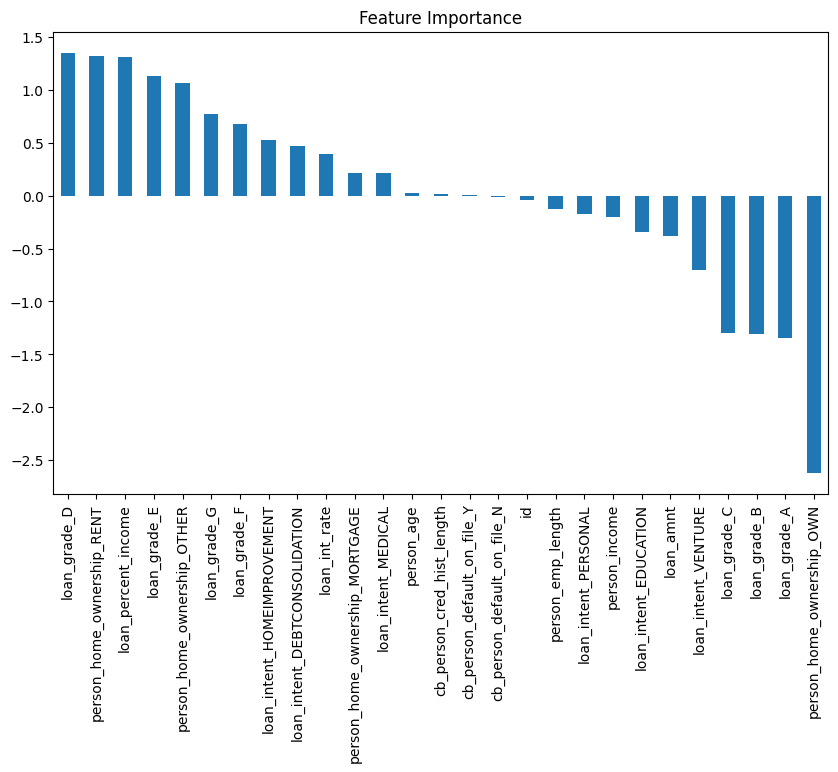

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check model steps
print(model.named_steps)

# Extract the ColumnTransformer
column_transformer = model.named_steps['columntransformer']  

# Check the names of transformers in the ColumnTransformer
print(column_transformer.named_transformers_)

# Use the correct name for the OneHotEncoder
ohe = column_transformer.named_transformers_['cat']  # Using 'cat' for OneHotEncoder

# Assuming you have defined your categorical_features and numerical_features lists
# Get feature names after transformation
ohe_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate((numerical_features, ohe_feature_names))

# Get coefficients
coefficients = model.named_steps['logisticregression'].coef_[0]
feature_importance = pd.Series(coefficients, index=all_feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()
